## Import Libraries

In [191]:
import pandas as pd # Pandas for data manipulations
import numpy as np  # Numpy for the computations
import os
from sklearn.metrics import accuracy_score,classification_report # For metrics
from sklearn.model_selection import train_test_split             # For train and test splits
from sklearn.model_selection import GridSearchCV                 # For GridSearch and K-fold cross validation
from sklearn.impute import SimpleImputer                         # For Imputation

import matplotlib.pyplot as plt # For visualizations
import seaborn as sns           # For visualizations

import warnings                   # For warnings
warnings.filterwarnings('ignore') # Supress/Ignore warnings

### Function for training the model

In [192]:
# Function to count the null values and their percentages in each column.
def fn_nulls_count(df):
    # Nulls counts in each column.
    nulls_counts = df.isnull().sum()
    # Convert above series into dataframe.
    nulls_counts_df = nulls_counts.to_frame(name = 'nulls_count')
    # Add a new column - to get the null counts percentage to the total rows.
    nulls_counts_df['nulls_percentage'] = round(100 * nulls_counts_df['nulls_count']/df.shape[0], 2)
    # Return the null counts dataframe.
    return nulls_counts_df

In [193]:
def fn_dtype_check(df):
    """
    It check the datatype with unique function
    also calculate mean min max 
    """
    import pandas as pd # Pandas for data manipulations
    x1=pd.DataFrame(df.dtypes)
    x1.columns=[ 'datatype']
    x1['unique']=pd.DataFrame(df.nunique())
    x1['Mean']=round(df.mean(),2)
    #x1['Min']=round(df.min(),2)
    #x1['Max']=round(df.max(),2)
    x1['Min']=df.min()
    x1['Max']=df.max()
    
    print("-----------------------------------------------------")
    rows, col=df.shape
    print('There are total {}'.format(rows),'rows and {}'.format(col),"columns")
    
    print("-----------------------------------------------------")
    # Find categorical columns list
    object_columns = [cname for cname in df.columns if df[cname].dtype in ['object']]
    # Find categorical columns list
    bool_columns   = [cname for cname in df.columns if df[cname].dtype in ['bool']]

    # Find categorical columns list
    float_columns =  [cname for cname in df.columns if df[cname].dtype in ['float64']]
    # Find numerical columns list
    int_columns =    [cname for cname in df.columns if df[cname].dtype in ['int64']]
    
    # Find categorical columns list
    cat_columns =df.shape[1]- (len(object_columns) + len(bool_columns)+len(int_columns))     
    print('Thereare:',len(object_columns),'(object),',len(bool_columns),'(bool),',cat_columns,
          '(categorical),',len(float_columns),'(float) and',len(int_columns),'(int) columns')

    print("-----------------------------------------------------")
    print("Total number of Null values: ",df.isnull().sum().sum())
    
    # Rows containing duplicate data
    print("------------------------------------------------------")
    print("Number of duplicate rows: ", df[df.duplicated()].shape[0]," % of rows: ",(df[df.duplicated()].shape[0]*100/df.shape[0])) 
    print("------------------------------------------------------")
    print()
    print("------------------------------------------------------")
    print("--- Data type with no Unique and range vaules --------")
    print("------------------------------------------------------")
   
    return x1
#==============================

In [194]:
#================================================================        
# Dataset EDA Analysis
#================================================================
def fn_EDA_info(df):
    """
    Dataset Analysis
    """
    rows, col=df.shape
    print("-------------------------------------------")
    print('There are total {}'.format(rows),'rows and {}'.format(col),"columns")
    print("-------------------------------------------")
    print("Total number of Null values: ",df.isnull().sum().sum())
    print("-------------------------------------------")
    print()
   
    print("-------------------------------------------")
    print("Data Columns name")
    print("--------------------")
    print(df.columns)
    print()
    
    # What is the distribution of numerical columns?
    print("------------------------------------------------------------------")
    print("----------Head of the data----------------------------------------")
    print("------------------------------------------------------------------")
    print(df.head(5))
   
    print("------------------------------------------------------------------")
    # What about categorical variable levels count?
   
    print("----------Tail of data--------------------------------------------")
    print("------------------------------------------------------------------")
    print(df.tail(5))
         
    # What is the distribution of all columns?
    print("----------------------------------------------------------------") 
    print("---------------- Data distribution Data-------------------------")   
    print("----------------------------------------------------------------")
    print(df.describe(include='all'))
    #print("--------------------------------------------------------")
    
    # What about categorical variable levels count?
    #print("--------------------------")
    #print(df.describe(include=['object']))
    #print("--------------------------")
#=================================================================================      

In [195]:
#====================================================
# Correlation Heatmap
#====================================================
def fn_correlation_heatmap(df):
    """ Function to plot correlatio in data"""
    import matplotlib.pyplot as plt # For visualizations
    import seaborn as sns           # For visualizations

    plt.figure(figsize=(18,18))
    matrix = np.triu(df.corr())
    sns.heatmap(df.corr(),mask=matrix, annot=True,cmap='BrBG',fmt='.2f')
    plt.title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=16);
    plt.xticks(rotation=90)
    plt.show()
#=================================================================
# Covariance matrix
#=================================================================   

def fn_corr_check(df,cutoff):
    """
    To find Corr() function values 
    fn_corr_check(data,cutoff):
    output: column names 
    """
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    corr = df.corr()
    import numpy as np  # Numpy for the computations
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j] ) >= cutoff:
                if columns[j]:
                    columns[j] = False
    selected_columns = df.columns[columns]
    return selected_columns             

### Train data reading

In [229]:
folder="D:/Notes/TechGig/data"
os.listdir(folder)

['Phising_Sample_Submisson.csv',
 'Phising_Testing_Dataset.csv',
 'Phising_Training_Dataset.csv',
 'ProblemStatement.pdf',
 'test_predictions_20thJun_xbm.csv']

In [230]:
df_train = pd.read_csv(folder+ u'//'+'Phising_Training_Dataset.csv')
df_train.index=df_train['key']
df_train.drop('key', inplace=True, axis=1)
print(df_train.shape)
df_train.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [231]:
df_train = pd.read_csv(folder+u'//'+'Phising_Training_Dataset.csv')
df_train.index=df_train['key']
df_train.drop('key', inplace=True, axis=1)
print(df_train.shape)
df_train.head()

(8955, 31)


,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
key,,,,,,,,,,,,,,,,,,,,,
12344,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
12345,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
12346,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
12347,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
12348,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [232]:
fn_dtype_check(df_train)

-----------------------------------------------------
There are total 8955 rows and 31 columns
-----------------------------------------------------
Thereare: 0 (object), 0 (bool), 0 (categorical), 0 (float) and 31 (int) columns
-----------------------------------------------------
Total number of Null values:  0
------------------------------------------------------
Number of duplicate rows:  3741  % of rows:  41.77554438860972
------------------------------------------------------

------------------------------------------------------
--- Data type with no Unique and range vaules --------
------------------------------------------------------


,datatype,unique,Mean,Min,Max
having_IP,int64,2,0.31,-1,1
URL_Length,int64,3,-0.64,-1,1
Shortining_Service,int64,2,0.74,-1,1
having_At_Symbol,int64,2,0.71,-1,1
double_slash_redirecting,int64,2,0.74,-1,1
Prefix_Suffix,int64,2,-0.74,-1,1
having_Sub_Domain,int64,3,0.07,-1,1
SSLfinal_State,int64,3,0.26,-1,1
Domain_registeration_length,int64,2,-0.34,-1,1
Favicon,int64,2,0.62,-1,1


### Divide data into training and validation subsets

In [233]:
# Divide data into training and validation subsets
y = df_train['Result']
X = df_train.drop(['Result'], axis=1)
Results_replace={ 1:'legitimate',0:'suspicious',-1:'phishing'}
plot_data.replace(Results_replace, inplace=True)

 1    56.214405
-1    43.785595
Name: Result, dtype: float64

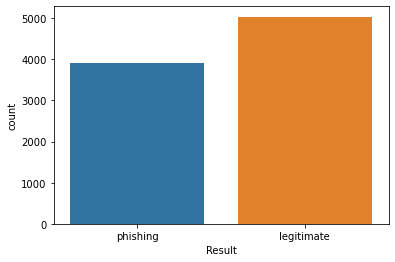

In [234]:
plot_data = y.to_frame()
plot_data.replace(data, inplace=True)
sns.countplot(x = 'Result', data=plot_data)
df_train.Result.value_counts()*100/df_train.shape[0]

In [235]:
fn_EDA_info(df_train)

-------------------------------------------
There are total 8955 rows and 31 columns
-------------------------------------------
Total number of Null values:  0
-------------------------------------------

-------------------------------------------
Data Columns name
--------------------
Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

------------------------------------------------------------------
----------Head of the data--------------------------

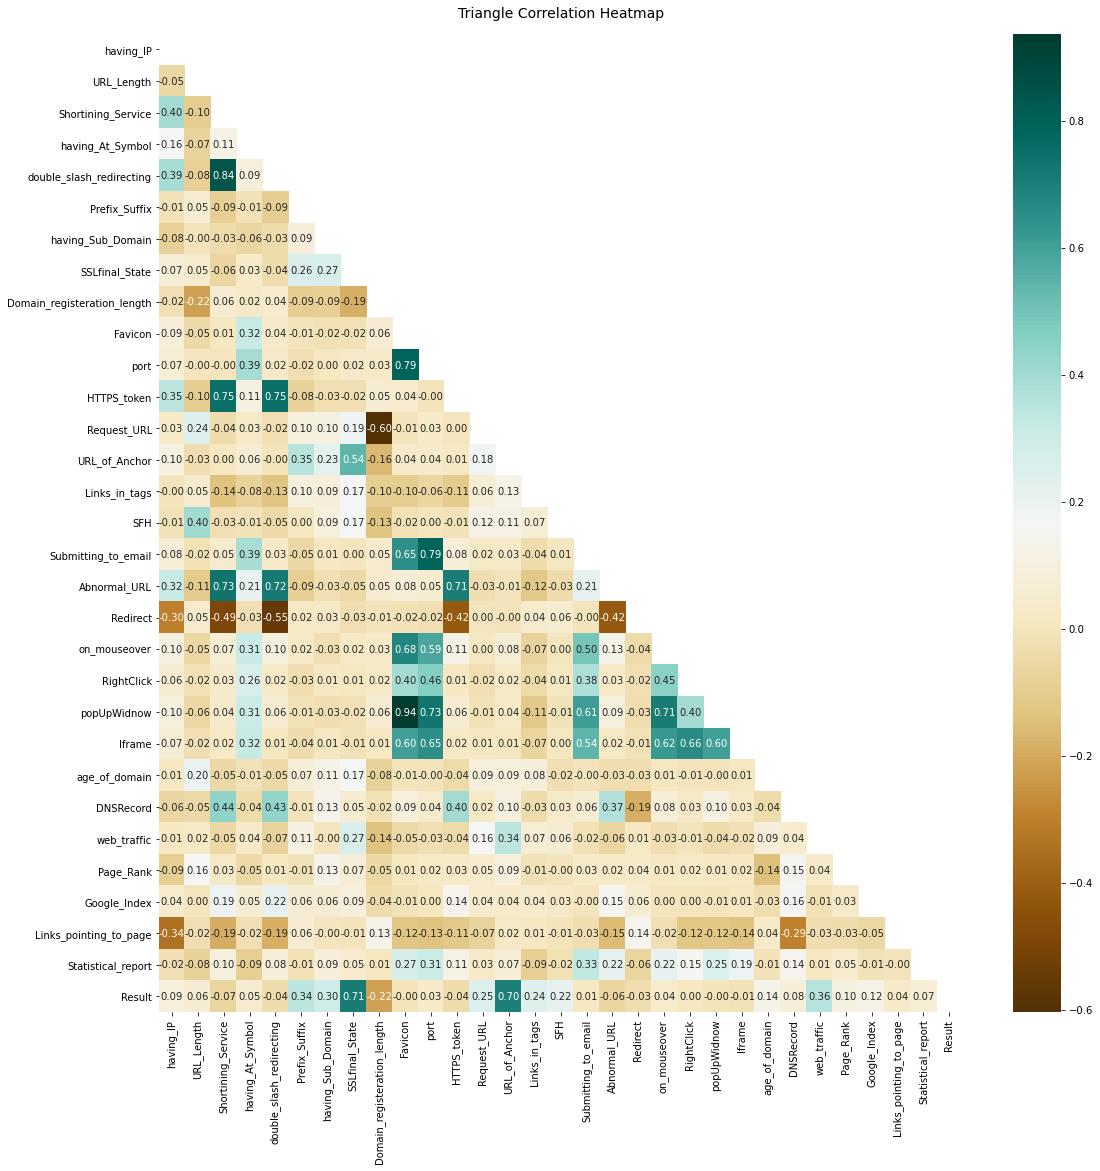

In [236]:
columns = df_train.columns
fn_correlation_heatmap(df_train[columns[0:]])

In [237]:
fn_corr_check(df_train,0.99)

Index(['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [238]:
def fn_duplication_check(df):

    """Checking rows dat-duplication"""
    print("------------------------------------------------------")
    print("Number of duplicate rows: ", df[df.duplicated()].shape[0]," % of rows: ",(df[df.duplicated()].shape[0]*100/df.shape[0])) 
    print("------------------------------------------------------")
    print()

In [239]:
fn_duplication_check(df_train)

------------------------------------------------------
Number of duplicate rows:  3741  % of rows:  41.77554438860972
------------------------------------------------------



In [240]:
def fn_zeroVar_cols(df, cutoff):
    """
    fn_zero_Variance(df,cutoff):
    Here cutoff value need to give (general value: 0.80)
    output: 1. column names (to delete)
    """
    col_delete_var=[]
    for i in df.columns:
        x0=df[i].value_counts(normalize=True).to_list()[0]
        if x0>=cutoff:
            col_delete_var.append(i)
    return col_delete_var


In [241]:
def fn_zeroVar_details(df, cutoff):
        """
        fn_zero_Variance(df,cutoff):
        Here cutoff value need to give (general value: 0.80)
        output: 1. values print
               2. column names (to delete)
        """
        col_delete_var=[]
        for col in df.columns:
            print("-------------------------------------------")
            x1=df[col].value_counts(normalize=True).to_list()
            print('Top 2 Unique % :', x1[0:2])
        
            x2=df[col].value_counts(normalize=True).to_list()[0]
            if x2>=cutoff:
                print('column"', col,'"has to delete from the data')
                col_delete_var.append(col)
            else:
                print('column"',col,'" has to keep')
        return col_delete_var

In [242]:
cutoff=0.90
zeroVar_col=fn_zeroVar_cols(df_train, cutoff)
zeroVar_col

['RightClick', 'Iframe']

In [243]:
fn_zeroVar_details(df_train[zeroVar_col], cutoff)

-------------------------------------------
Top 2 Unique % : [0.9600223338916807, 0.039977666108319376]
column" RightClick "has to delete from the data
-------------------------------------------
Top 2 Unique % : [0.9149078726968174, 0.08509212730318258]
column" Iframe "has to delete from the data


['RightClick', 'Iframe']

In [244]:
zeroCol=['RightClick', 'Iframe']
df[zeroCol[0]].value_counts(normalize=True).to_list()

[0.9600223338916807, 0.039977666108319376]

In [213]:
df[zeroCol[1]].value_counts(normalize=True).to_list()

[0.9149078726968174, 0.08509212730318258]

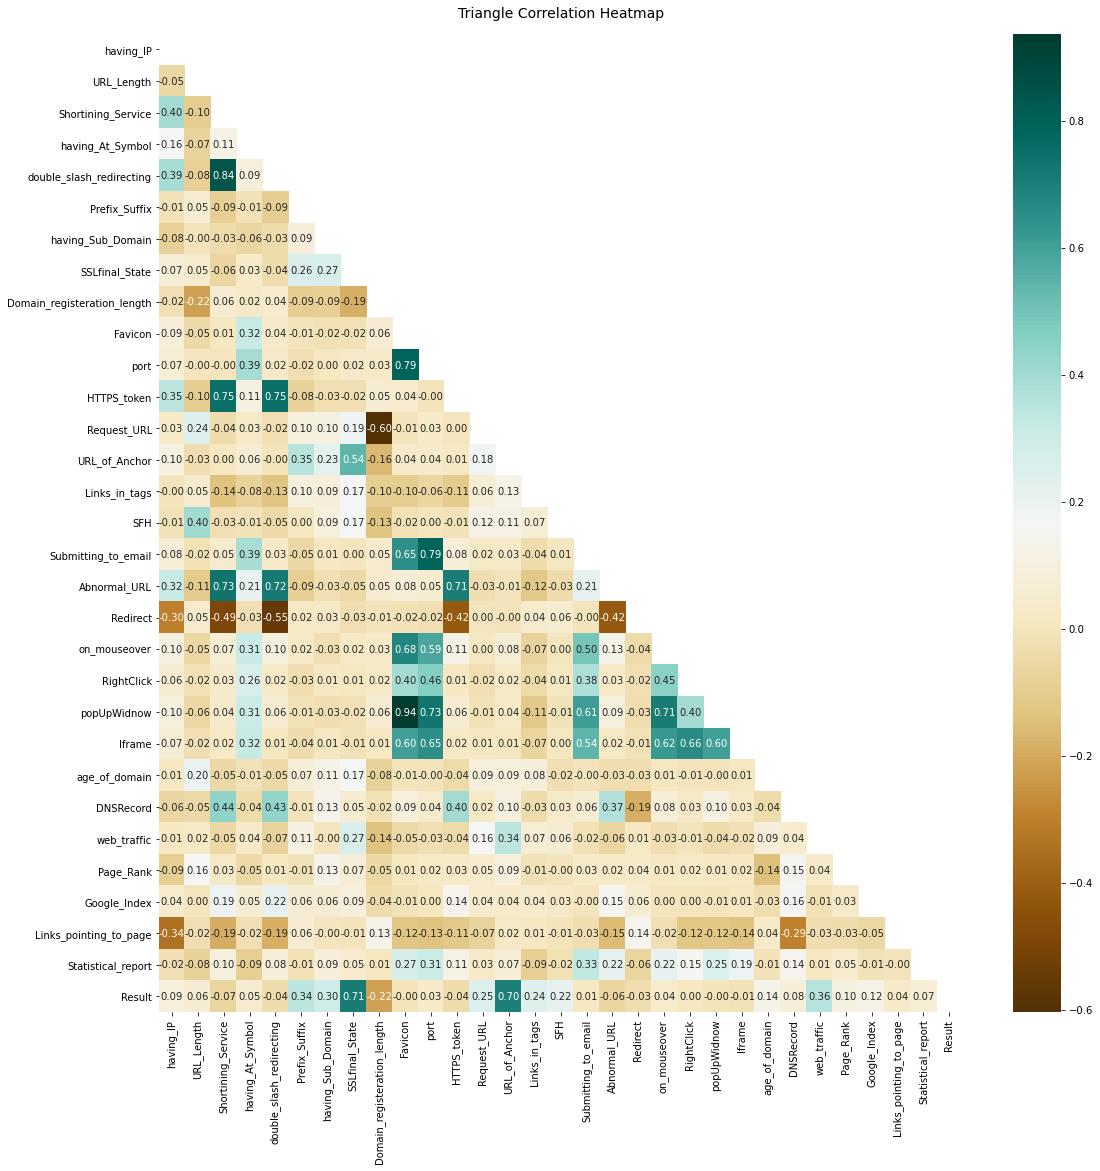

In [214]:
fn_correlation_heatmap(df_train)

In [215]:
def fn_plot_ts_residuals(df):
    """ Function to plot time series residual plot  """
    import matplotlib.pyplot as plt # For visualizations
    values=df.values # retrive data as numpy array
    print(values.shape)
    # Create a subplot for each time series
    plt.figure(figsize=(16,16))
    for i in range(values.shape[1]):
        plt.subplot(values.shape[1],1,i+1)
        plt.plot(values[:,i])
    plt.show()  

(8955, 31)


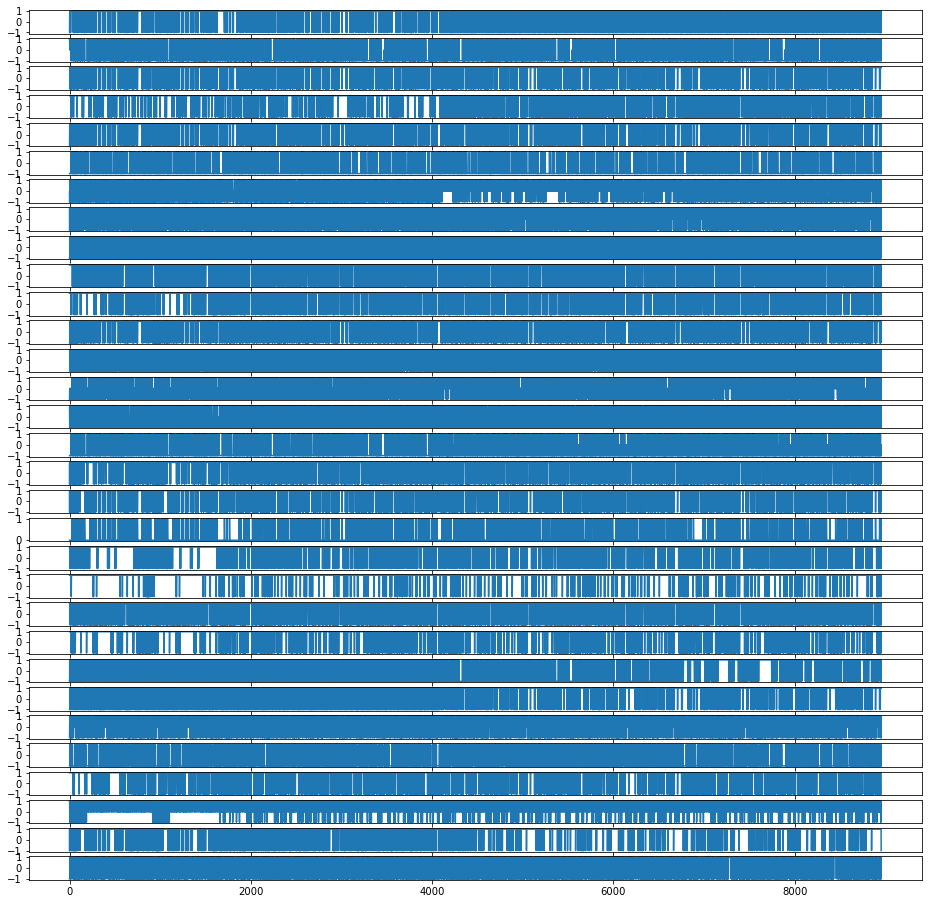

In [246]:
df=df_train.copy()
fn_plot_ts_residuals(df)

In [247]:
def fn_plot_correlation(df):
    """ Function to plot correlatio in data"""
    import matplotlib.pyplot as plt # For visualizations
    import seaborn as sns           # For visualizations
    plt.figure(figsize=(20,20))
    sns.heatmap(df.corr(),annot=True)
    plt.xticks(rotation=45)
    plt.show()

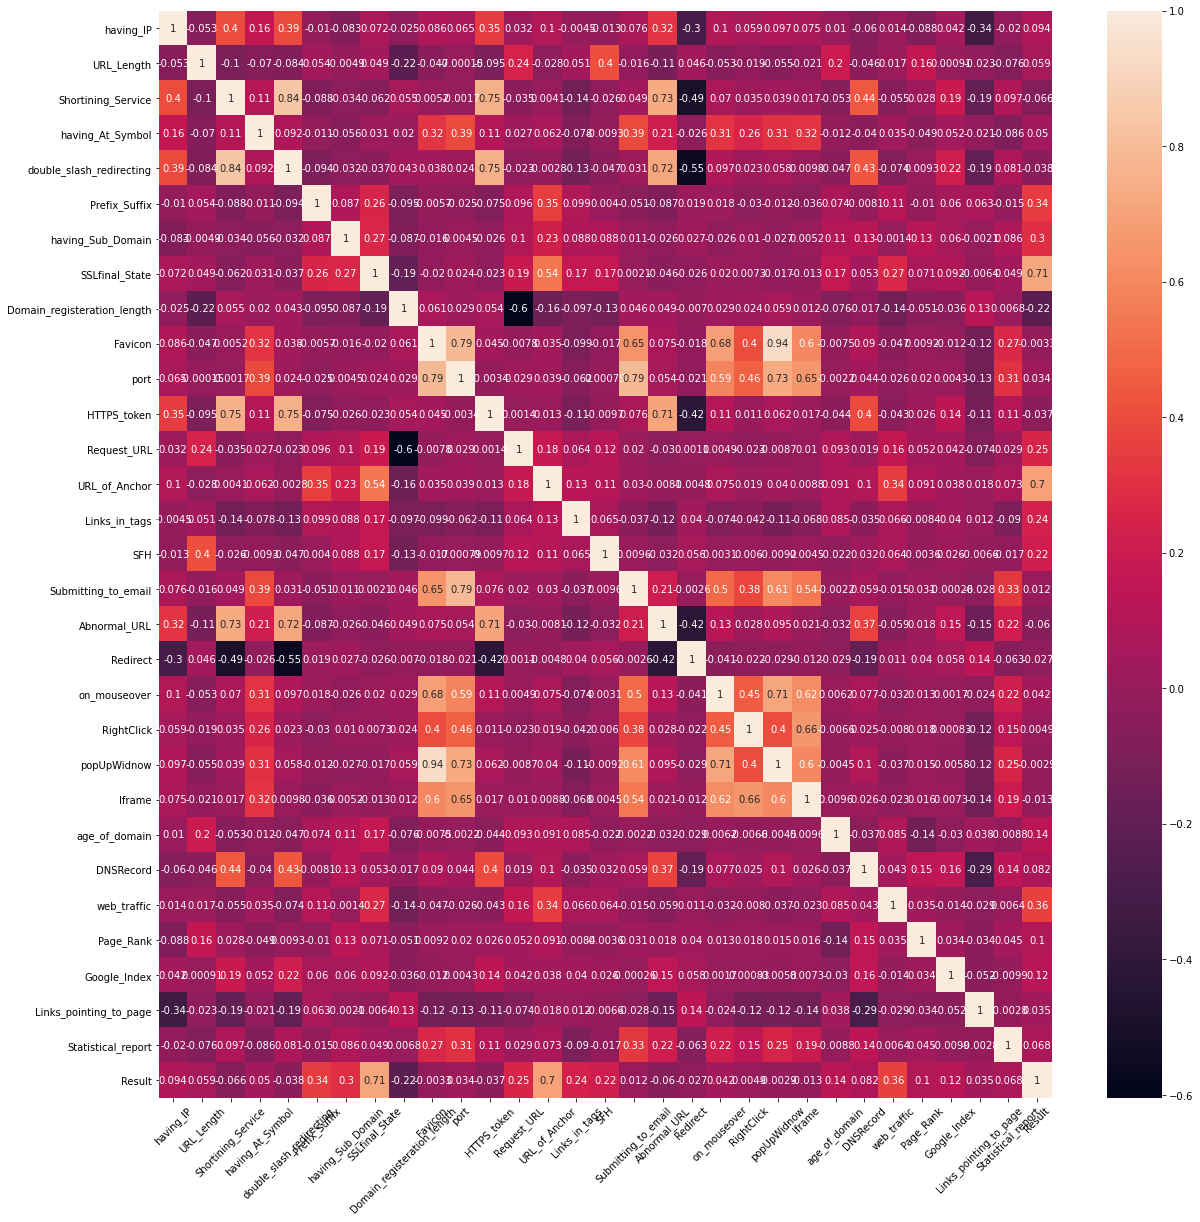

In [248]:
fn_plot_correlation(df)

In [249]:
def fn_nulls_heatmap(df):
    import matplotlib.pyplot as plt # For visualizations
    import seaborn as sns           # For visualizations
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

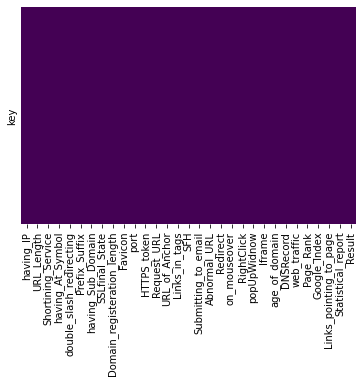

In [250]:
fn_nulls_heatmap(df)

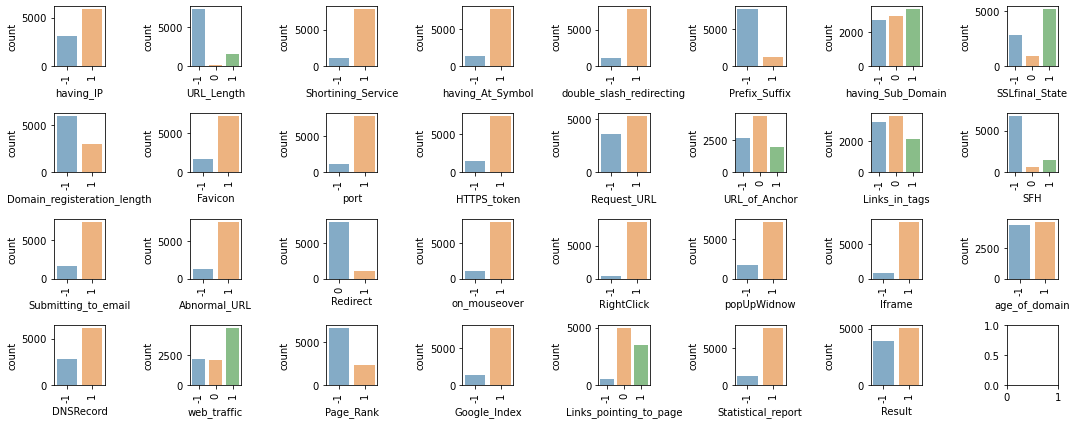

In [253]:
def fn_categorical_conversion(df,columns):
    for i in columns:
        df[i]=df[i].astype('category')
        
columns=df.columns
fn_categorical_conversion(df,columns)

def fn_plot_countplot(df_not_num):

    import matplotlib.pyplot as plt # For visualizations
    import seaborn as sns           # For visualizations
    fig,axes =plt.subplots(round(len(df_not_num.columns)/8),8,figsize=(15,6))
    for i, ax in enumerate(fig.axes):
        if i<len(df_not_num.columns):
            ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
            sns.countplot(x=df_not_num.columns[i],alpha=0.6,data=df_not_num,ax=ax,dodge=True,)
    fig.tight_layout()
fn_plot_countplot(df)

In [254]:
columns=['having_IP', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report']

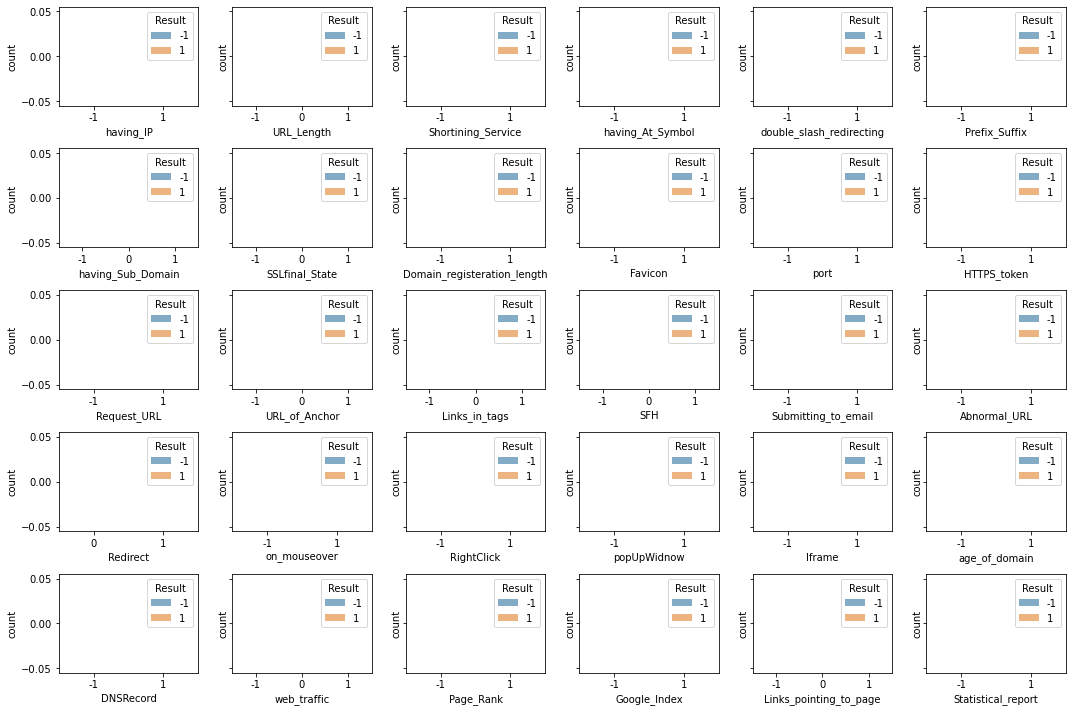

In [294]:
df=df_train.copy()

Results_replace={ 1:'legitimate',0:'suspicious',-1:'phishing'}
df['Result'].replace(Results_replace, inplace=True)
columns=df.columns
fn_categorical_conversion(df,columns)
df['Result'].value_counts()

legitimate    5034
phishing      3921
Name: Result, dtype: int64

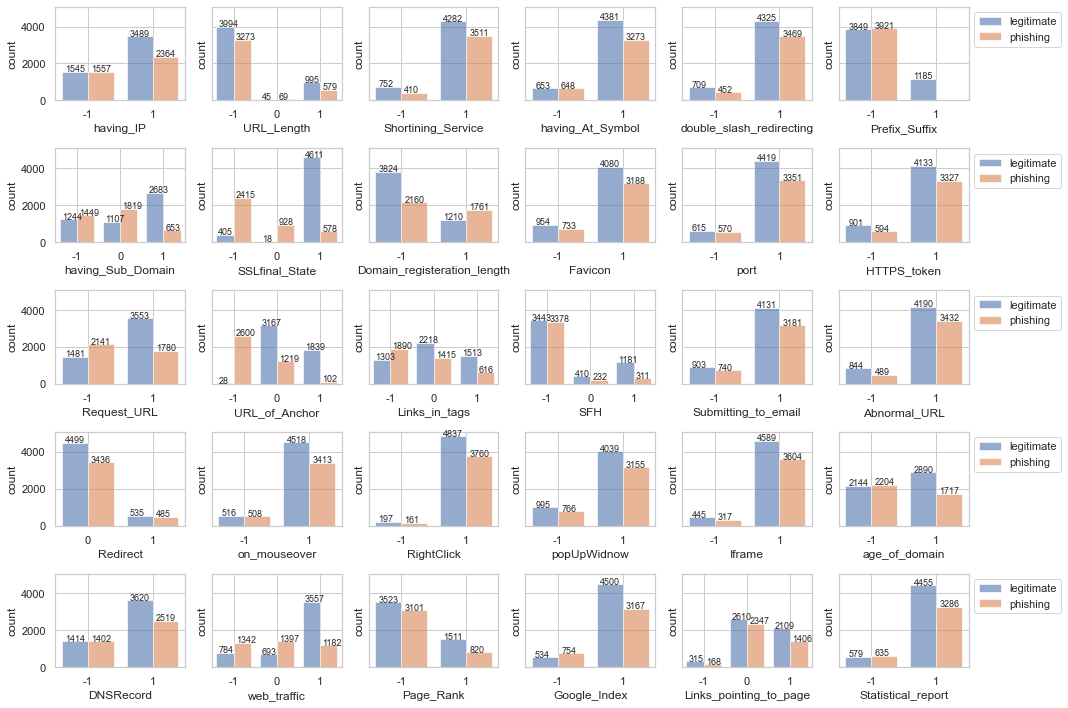

In [368]:
sns.set(style="ticks")
#sns.set_style("default")
#sns.set_style('white')
sns.set_style('whitegrid')
#sns.set_style('ticks')



PlotType= 2 #1 Boxplot 2.Stripplot
numberCols=6
numberRows=int(len(df.columns)/numberCols)
fig, axes = plt.subplots(numberRows,numberCols, figsize=(15,10),squeeze=False,sharey='all',sharex=False )
Index=0

for row in range(numberRows):
    for col in range(numberCols):
        sns.countplot(x=df.columns[Index],alpha=0.6,data=df,ax=axes[row][col],hue='Result',saturation=0.951,)
        #axes[row][col].set_title(df.columns[Index],fontweight ='bold')
        axes[row][col].legend(bbox_to_anchor=(1, 1), loc='upper left')
        axes[row][col].get_legend().remove()
        axes[row][col].grid("y")
        for p in axes[row][col].patches:
            axes[row][col].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.02),size=9)

        #ax3.grid(axis="x")
        #axes[row][col].set_xticklabels(labels=xSampleName, Rotation=90, fontweight ='bold')
    
        if Index<=31:
            Index+=1
        
axes[0][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[1][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[2][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[3][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
axes[4][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
plt.subplots_adjust(left=0.01,
                            bottom=0.1,
                            right=5.0,
                            top=0.9,
                            wspace=0.01,
                            hspace=0.01)
plt.tight_layout()

In [322]:
sns.set(style="ticks")
sns.set_style("darkgrid")

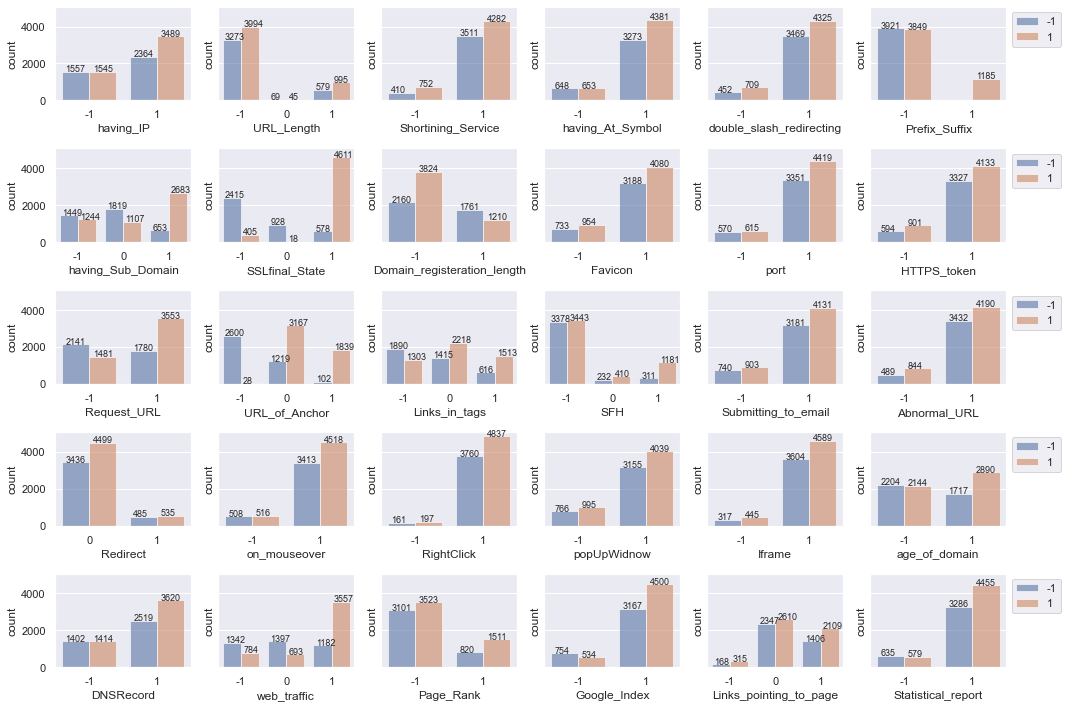

In [350]:
PlotType= 2 #1 Boxplot 2.Stripplot
numberCols=6
numberRows=int(len(df.columns)/numberCols)
fig, axes = plt.subplots(numberRows,numberCols, figsize=(15,10),squeeze=False,sharey='all',sharex=False )
Index=0

for row in range(numberRows):
    for col in range(numberCols):
        sns.countplot(x=df.columns[Index],alpha=0.6,data=df_train,ax=axes[row][col],hue='Result',saturation=0.75,)
        #axes[row][col].set_title(df.columns[Index],fontweight ='bold')
        axes[row][col].legend(bbox_to_anchor=(1, 1), loc='upper left')
        axes[row][col].get_legend().remove()
        
        #for p in axes[row][col].patches:
        #   axes[row][col].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=8)
        
        for p in axes[row][col].patches:
            axes[row][col].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.02),size=9)

        #ax3.grid(axis="x")
        #axes[row][col].set_xticklabels(labels=xSampleName, Rotation=90, fontweight ='bold')
    
        if Index<=31:
            Index+=1
        
axes[0][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[1][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[2][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[3][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
axes[4][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
plt.subplots_adjust(left=0.01,
                            bottom=0.1,
                            right=5.0,
                            top=0.9,
                            wspace=0.01,
                            hspace=0.01)
plt.tight_layout()




In [ ]:
import seaborn as sns
i
mport matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(dict(col1=np.array([2, 4, 1, 1, 1, 4])))

ax = sns.countplot(x="col1", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

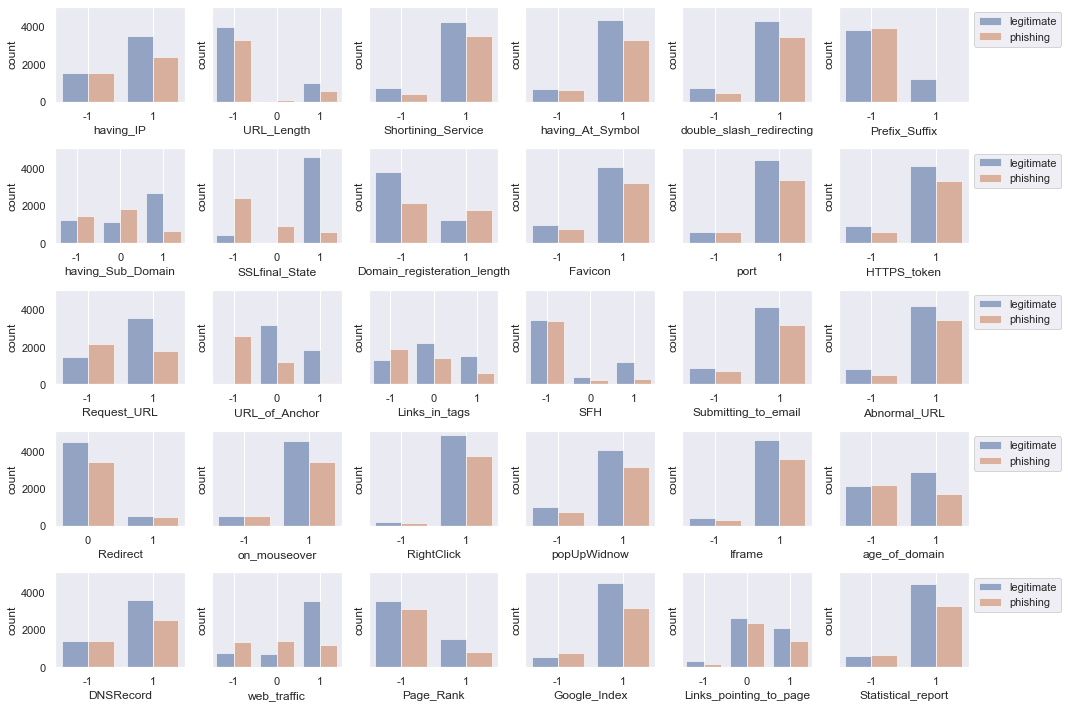

In [327]:
PlotType= 2 #1 Boxplot 2.Stripplot
numberCols=6
numberRows=int(len(df.columns)/numberCols)
fig, axes = plt.subplots(numberRows,numberCols, figsize=(15,10),squeeze=False,sharey='all',sharex=False )
Index=0

for row in range(numberRows):
    for col in range(numberCols):
        sns.countplot(x=df.columns[Index],alpha=0.6,data=df,ax=axes[row][col],hue='Result',saturation=0.75,)
        #axes[row][col].set_title(df.columns[Index],fontweight ='bold')
        axes[row][col].legend(bbox_to_anchor=(1, 1), loc='upper left')
        axes[row][col].get_legend().remove()
        axes[row][col].grid()
        #axes[row][col].grid(axis="y")
        #axes[row][col].set_xticklabels(labels=xSampleName, Rotation=90, fontweight ='bold')
    
        if Index<=31:
            Index+=1
        
axes[0][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[1][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[2][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left') 
axes[3][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
axes[4][numberCols-1].legend(bbox_to_anchor=(1, 1), loc='upper left')   
plt.subplots_adjust(left=0.01,
                            bottom=0.1,
                            right=5.0,
                            top=0.9,
                            wspace=0.01,
                            hspace=0.01)
plt.tight_layout()


